# Visión artificial aplicada a la industria
### Intecol SAS
## Clase 5: deteccion de bordes y  Transformaciones morfologicas basicas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy
from numpy import *
import cv2 as cv
import cv2
import numpy as np
from skimage import data 
from scipy.ndimage import filters

def plot(imagen,color='black',title=None,cmapa='gray',pic = False,subplot  = (1,1,1)):
    if pic == True:
        plt.figure(figsize=(15,8))
    plt.subplot(subplot[0],subplot[1],subplot[2])
    plt.axis('off')
    plt.imshow(imagen,cmap = cmapa,vmin = 0, vmax = 255)
    plt.title(title,color = color)

def plot_img_hist (image,title,subrows,subcols,num,size1,size2):
    fig = plt.figure(figsize=(size1,size2))
    plt.subplot(subrows,subcols,num)
    plt.imshow(image,cmap='gray');plt.title(title)
    color = ('r','g','b')
    plt.subplot(subrows,subcols,num+1)
    plt.title(" Histograma " + title)

    if len(image.shape) > 2 :            
        for i,col in enumerate(color):
            histr = cv2.calcHist([image],[i],None,[256],[0,256])
            plt.plot(histr,color = col)
            plt.xlim([0,256])
    else:
        hist,bins = np.histogram(image.ravel(),256,[0,256])
        plt.plot(hist, color='gray' )
        plt.xlim([0,256])

## Deteccion de bordes
### ¿Que es un borde?
 Un borde es un conjunto de pixeles en donde la intensidad de pixeles cambia rapidamente
### ¿Como lo podriamos detectar?
La mayoría de las técnicas para detectar bordes emplean operadores locales basados en distintas
aproximaciones discretas de la primera y segunda derivada de los niveles de grises de la imagen. 


## derivadas de una imagen

Se evalua como Cambia la intensidad de la imagen sobre la imagen, dicha informacion es utilizada en muchas aplicaciones (incluyendo deep learning). El cambio de intensidad puede cambiar en el eje x (*I_x*) y en el eje y (*I_y*)de la imagen *I* . cabe aclarar que las derivadas se realizan canal por canal.

el gradiente de la imagen es el vector $\rvert \nabla\rvert = 	\sqrt{I_x^2+I_y^2 }$

Que describe que tan fuerte es el cambio de la intensidad en la imagen .

 el angulo del gradiente viene dado por:
$ \alpha= 	\arctan{(I_y,I_x) }$
Que describe la direccion de el cambio de intensidad maximo en la imagen.

computar las imagenes de las derivadas se puede utilizar realizando aproximaciones discretas . Que son mas facilmente implementadas como convoluciones 

$I_x = I* D_x$  y  $I_y = I * D_y $

Las elecciones mas famosas para $D_x$ y $D_y$ son los *filtros prewitt*:


$D_x =\begin{bmatrix}-1&0&1\\-1&0&1\\-1&0&1\end{bmatrix}$ $D_y =\begin{bmatrix}-1&-1&-1\\0&0&0\\1&1&1\end{bmatrix}$

Y los *filtros Bosel*:

$D_x =\begin{bmatrix}-1&0&1\\-2&0&2\\-1&0&1\end{bmatrix}$ $D_y =\begin{bmatrix}-1&-2&-1\\0&0&0\\1&2&1\end{bmatrix}$



Veamos como funcionan:
![](images/convolution.jpg)
![](images/vertical.jpg)
![](images/padding.jpg)

In [2]:
def conv(img, conv_filter):
    filter_size = conv_filter.shape[1]
    result = numpy.zeros((img.shape))
    #Looping through the image to apply the convolution operation.
    for r in numpy.uint16(numpy.arange(filter_size/2.0, 
                          img.shape[0]-filter_size/2.0+1)):
        for c in numpy.uint16(numpy.arange(filter_size/2.0, 
                                           img.shape[1]-filter_size/2.0+1)):
            """
            Getting the current region to get multiplied with the filter.
            How to loop through the image and get the region based on 
            the image and filer sizes is the most tricky part of convolution.
            """
            curr_region = img[r-numpy.uint16(numpy.floor(filter_size/2.0)):r+numpy.uint16(numpy.ceil(filter_size/2.0)), 
                              c-numpy.uint16(numpy.floor(filter_size/2.0)):c+numpy.uint16(numpy.ceil(filter_size/2.0))]
            #Element-wise multipliplication between the current region and the filter.
            curr_result = curr_region * conv_filter
            conv_sum = numpy.sum(curr_result) #Summing the result of multiplication.
            result[r, c] = conv_sum #Saving the summation in the convolution layer feature map.
            
    #Clipping the outliers of the result matrix.
    final_result = result[numpy.uint16(filter_size/2.0):result.shape[0]-numpy.uint16(filter_size/2.0), 
                          numpy.uint16(filter_size/2.0):result.shape[1]-numpy.uint16(filter_size/2.0)]
    return final_result

def load_image(image_path):
    
    coloured_image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(coloured_image, cv2.COLOR_BGR2GRAY)
    return gray_image


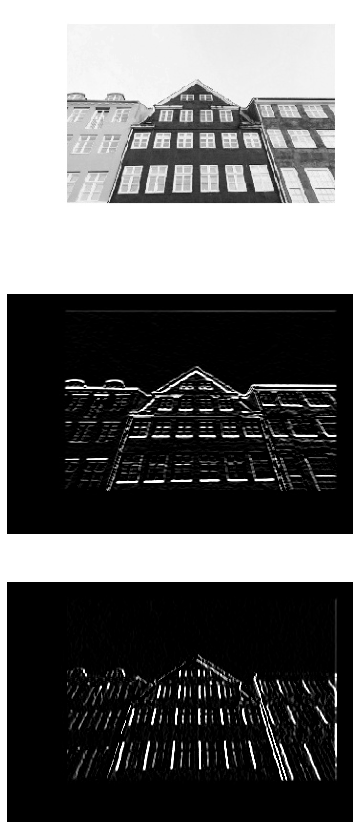

In [3]:
input_image = load_image('images/home.png')

l_y = numpy.array([[[-1, 0, 1],
                                   [-1, 0, 1],
                                   [-1, 0, 1]]])
l_x = numpy.array([[[1,   1,  1],
                                   [0,   0,  0],
                                   [-1, -1, -1]]])
edge_x = conv(input_image, l_x)
edge_y = conv(input_image, l_y)
plt.figure(figsize=(15,15))



plot(input_image,subplot = (3,1,1))
plot(edge_x,subplot = (3,1,2))
plot(edge_y,subplot = (3,1,3))

## Implementacion con librerias


In [4]:
# Sobel derivative filters
imx = zeros(input_image.shape)
filters.sobel(input_image,1,imx)
imy = zeros(input_image.shape)
filters.sobel(input_image,0,imy)
magnitude = sqrt(imx**2+imy**2)

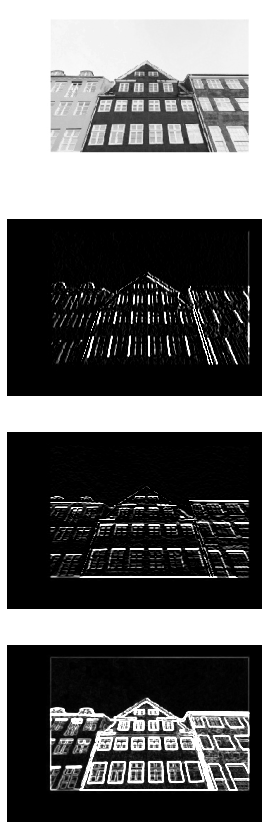

In [5]:
plt.figure(figsize=(15,15))
plot(input_image,subplot = (4,1,1))
plot(imx,subplot = (4,1,2))
plot(imy,subplot = (4,1,3))
plot(magnitude,subplot = (4,1,4))

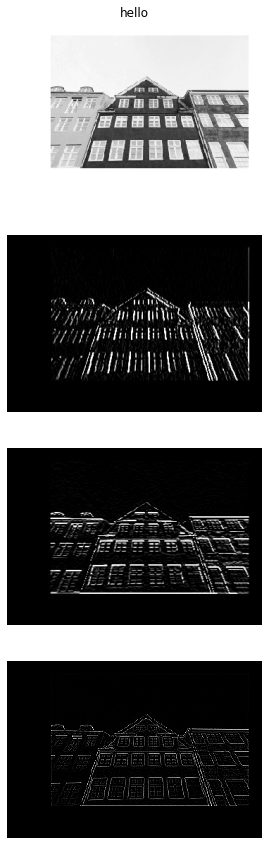

In [6]:
img = input_image
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_8U,1,0,ksize=3)
sobely = cv.Sobel(img,cv.CV_8U,0,1,ksize=3)
plt.figure(figsize=(15,15))
plot(input_image,subplot = (4,1,1),title = 'hello')
plot(sobelx,subplot = (4,1,2))
plot(sobely,subplot = (4,1,3))
plot(laplacian,subplot = (4,1,4))

En el ultimo ejemplo el tipo de salida de nuestra imagen es cv2.CV_8U o np.uint8. sin embargo hay un problema con eso . la transcicion de negro a blanco es tomada como pendiente positivamientras que la transcicion de blanco a negro es tomado como pendiente negativa . asi que cuando se convierte la data a unint.8 , todas las pendientes negativas son hechas cero , en otras palabras se pierde ese borde.

si quieres detectar ambos botds , se puede tener la imagen de salida en otros formatos mas altos , tales como cv2.CV_16S, cv2.CV_64F etc y luego tomar el valor absoluto y devolverlo a cv2.CV_8U de esta manera:

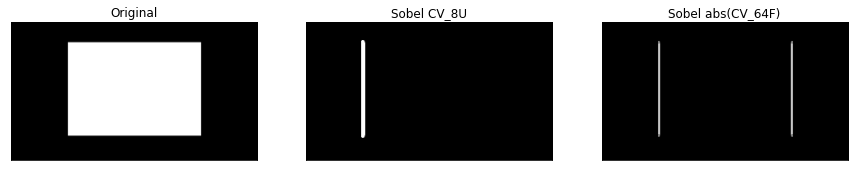

In [7]:
img2 = load_image('images/box.png')
# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img2,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img2,cv2.CV_64F,1,0,ksize=3)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.figure(figsize=(15,15))
plt.subplot(1,3,1),plt.imshow(img2,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()

## Filtro de Canny

Canny es la técnica mayormente utilizada para detectar bordes en las imágenes. Consiste en simplificar una imagen de tal manera que solo se dibuje el borde de los objetos, y eso se logra en cinco pasos:
* ** Reduccion de ruido: **
Se suele aplicar un filtro gaussiano para suavizar la imagen 

![](images/canny0.jpg)

* **Detección de bordes con Sobel:** Tal como vimos anteriormentese basa se basa en el cálculo de la primera derivada.

![](images/canny1.jpg)

* **Supresión de píxeles fuera del borde:** El objetivo en esta fase es poder quedarnos con aquellos bordes que cumplan cierta condición. En el detector de bordes Canny serán aquellos que tengan como grosor 1.

La supresión non-maximun es una técnica que permite adelgazar los bordes basándose en el gradiente.

![](images/canny2.jpg)


* ** Doble threshold: **

permite identificar 3 tipos de pixeles: Fuertes , debiles y no relevantes:

los pixeles fuertes son pixeles que tienen intensidad tan alta que van a contribuir al borde final.

pixeles debiles son aquellos pixeles que tienen un nivel de intesnsidad que no es suficiente para ser un pixel de intensidad fuerte ni tampoco es considerado no relevantes

todo el resto de pixeles son no relevantes.

se utiliza doble threshold , uno alto para identificar pixeles fuertes y uno bajo para identificar pixeles no relevantes.
y los pixeles que estan en ambos thresholds seran pixeles debiles .

![](images/canny3.jpg)

En la anterior imagen los pixeles blancos son los pixeles fuertes y los grises pixeles debiles 



* ** histéresis:** 

Basado en los resultados anteriores la histeresis conosiste en transformar pixeles debiles en pixeles fuertes , si y solo si al menos uno de los pixeles alrededor es uno fuerte, de la siguiente manera:

![](images/canny4.jpg)

Al hacer la conversion con el condicional indicado se obtiene : 

![](images/canny5.jpg)

Todo este proceso puede ser extremadamente difícil de implementar por ti mismo. Gracias a OpenCV todo esto resulta relativamente sencillo y práctico.

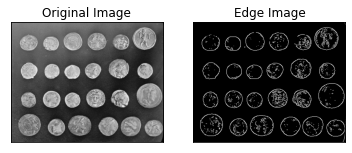

In [8]:
img = data.coins()
edges = cv.Canny(img,250,255)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Ejercicio: 
Encontrar la fila del borde superior de la siguiente imagen:

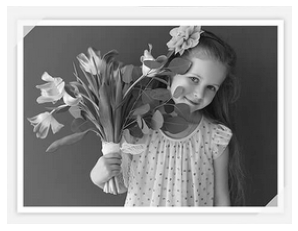

In [72]:
img = load_image('images/marco.png')
plot(img)

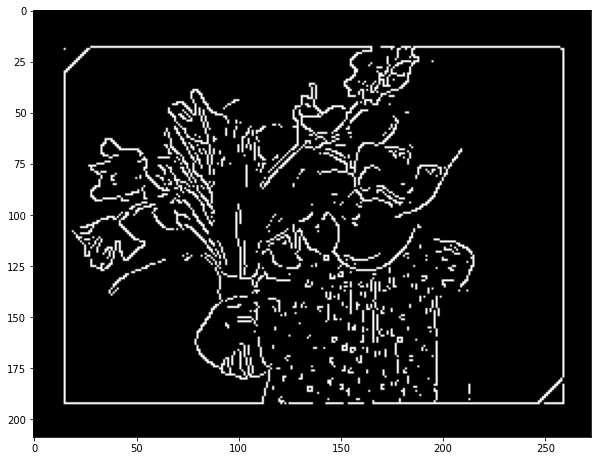

In [74]:
canny_img = cv.Canny(img,250,255)
plt.figure(figsize=(10,10))
plt.imshow(canny_img,cmap = 'gray')
plt.show()

In [78]:

top_sum = 0
edge = 0
for row in range(0,int(img.shape[0] * 0.1)):
    suma = np.sum(canny_img[row])
    if suma > top_sum:
        top_sum = suma
        edge = row
print(edge)

18


 ## Transformaciones morfologicas basicas


Las operaciones morfologicas son llamadas asi por que basicamente modifican la forma de los objetos binarios, estos metodos son aplicados normalmente a imagenes binarias, pero puede ser usada en escala de grises tambien. 
para realizar las operaciones morfologias se convoluciona la imagen binaria con un kernel que decide la naturaleza de la operacion. 


Las operaciones estandar incluyen :


###  **Erosion(Erosion)**:
 El kernel se desplaza en toda la imagen(convolucion) y se busca el valor minimo que se encuentra en esa porcion de imagen(minimo local), si todos los pixeles bajo el kernel valen 1(el minimo local es 1), entonces la imagen de salida en esa posicion va a ser 1, de lo contrario si hay al menos un zero debajo del kernel pues el resultado va a ser cero.
 

La operacion de erosion puede observarse a continuacion:


![](images/erosion1.jpg)

en el caso de que el kernel es una matriz 3x3 de 1s  el
resultado será 1 para el punto en estudio si todos los puntos del kernel están contenidos dentro del
conjunto del objeto

![](images/erosion_.jpg)

Se utiliza para desaparecer el ruido, disminuir el tamaño de las regiones , remover puentes entre regiones  y protusiones. 

###  **Dilatacion(dilation)**: 
Es una operacion completamente inversa a la erosion, se recorre con el kernel la imagen completa y se calcula el maximo local para cada posicion del kernel. Este maximo local se va a guardar en la imagen de salida. asi si todos los pixeles bajo el kernel valen 0 pues el resultado va a ser cero, pero si hay algun 1, el resultado sera 1

A continuacion se puede observar el resutlado de utilizar dilatacion:

![](images/dilation1.jpg)

Si hubiese al menos un valor de 1(pixel blanco) del kernel que se traslapara con un 1(pixel blanco) en la imagen binaria, entonces el resultado es 1. Si por el contrario, si los 1s del kernel se traslapan unicamente con los 0s nuestra salida sera cero.
Se pueden utilizar diferentes kernel , si por ejemplo se utilizara un kernel de 3x3 con solo 1s. entonces un pixel es 1 si al menos un pixel traslapado con el kernel es 1.


![](images/dilatacion.jpg)

Se utiliza para rellenar huecos y espacios en la region y agrandar la region 

###  ** Apertura (opening):**
Esta operación se realiza mediante una erosión seguida de una dilatación empleando el mismo kernel. Al erosionar se pierden detalles pequeños, desaparece el ruido y  mengua la imagen. si seguidamente se hace la dilatación, la imagen crece a su tamaño inicial y los detalles que no llegaron a perderse se resaltan.


![](images/opening_1.jpg)

###  **Cierre (closing):**
En este caso en primer lugar se hará una operación de dilatación, para seguidamente, manteniendo
el mismo EE, hacer una erosión. Al dilatar se rellenan intersticios, la imagen crece, luego cuando se
erosiona la imagen vuelve a un tamaño semejante al original.

![](images/closing.jpg)

### **Gradiente morfologico(morphological gradient)** :

Es la diferencia entre la dilatación y la erosión de una imagen. El resultado se verá como el contorno del objeto.

![](images/gradient.jpg)


### ** Top hat : **
Es la diferencia entre la imagen de entrada y el opening de la imagen. Al utilizar el filtro se devuelve una imagen conteniendo regiones que son mas pequeñas que el kernel y son mas brillantes que sus alreadedores
It is the difference between input image and Opening of the image.



### **Black hat: **
Es la diferencia entre el cierrede la imagen de entrada y la imagen de entrada.Devuelve regiones que son mas pequeñas que el kernel y son mas oscuras que sus alreadedores


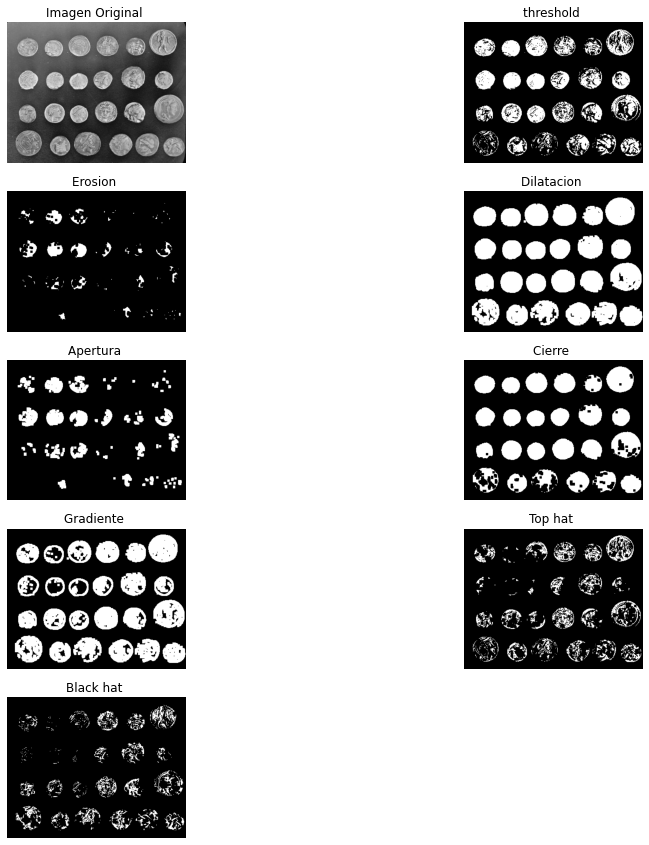

In [9]:

morph_img = data.coins()
ret,thresh1 = cv.threshold(morph_img,150,255,cv.THRESH_BINARY)
kernel = np.ones((5,5),np.uint8)
morph_erosion = cv2.erode(thresh1,kernel,iterations = 1)
morph_dilation = cv2.dilate(thresh1,kernel,iterations = 1)
morph_opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
morph_closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)
morph_gradient = cv2.morphologyEx(thresh1, cv2.MORPH_GRADIENT, kernel)
morph_tophat = cv2.morphologyEx(thresh1, cv2.MORPH_TOPHAT, kernel)
morph_blackhat = cv2.morphologyEx(thresh1, cv2.MORPH_BLACKHAT, kernel)

plt.figure(figsize=(15,15))
plot(morph_img,subplot = (5,2,1),title = f'Imagen Original ',)
plot(thresh1,subplot = (5,2,2), title= 'threshold ')
plot(morph_erosion,subplot = (5,2,3), title= 'Erosion ')
plot(morph_dilation,subplot = (5,2,4), title= 'Dilatacion ')
plot(morph_opening,subplot = (5,2,5), title= 'Apertura ')
plot(morph_closing,subplot = (5,2,6), title= 'Cierre ')
plot(morph_gradient,subplot = (5,2,7), title= 'Gradiente ')
plot(morph_tophat,subplot = (5,2,8), title= 'Top hat ')
plot(morph_blackhat,subplot = (5,2,9), title= 'Black hat ')


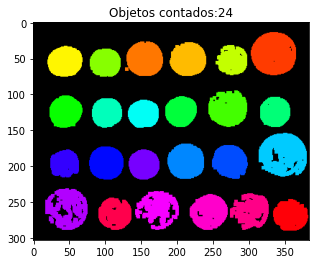

In [10]:
# Labeling

ret, labels = cv.connectedComponents(morph_dilation)
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv.cvtColor(labeled_img, cv2.COLOR_HSV2RGB)

labeled_img[label_hue == 0] = 0

plt.title('Objetos contados:'+ str(ret-1))
plt.imshow(labeled_img)

plt.show()

## Ejercicio:

Aplicar una transformacion morfologica que elimine la galaxia y deje unicamente las estrellas mas pequeñas de fondo.

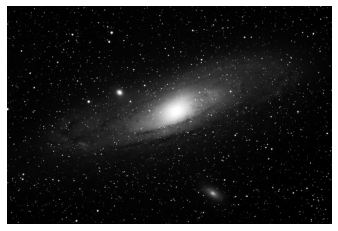

In [65]:
galaxia = cv2.imread('images/testing2.png')
plot(galaxia)

In [68]:
# filterSize =(3, 3) 
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT,filterSize)     
# 
kernel = np.ones((3,3),np.uint8)
                                   
input_image = cv2.cvtColor(galaxia, cv2.COLOR_BGR2GRAY) 
  
# Applying the Top-Hat operation 
tophat_img = cv2.morphologyEx(galaxia,  
                              cv2.MORPH_TOPHAT, 
                              kernel)           

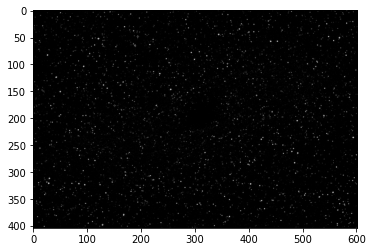

In [69]:
plt.imshow(tophat_img)

## Ejercicio : 

1. Leer y contar el numero de guisantes en la imagen(el numero de objetos).

2. Contar el numero de frijoles y el numero de arvejas separadamente.

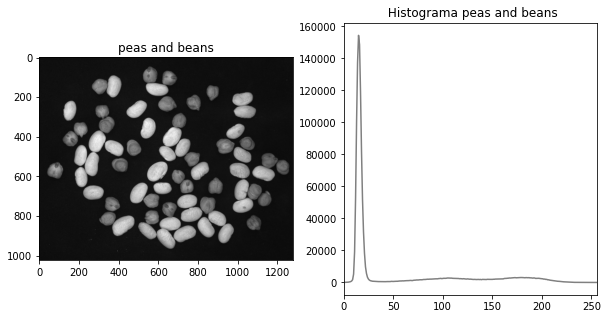

In [11]:
peas = load_image('images/peas_and_beans.png')
plot_img_hist(peas,'peas and beans',1,2,1,10,5)

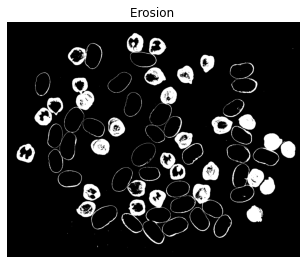

In [48]:
ret,thresh1 = cv.threshold(peas,30,70,cv.THRESH_BINARY)
myResult = cv.inRange(peas, 50, 120)
plt.figure(figsize=(25,25))
plot(myResult,subplot = (5,2,3), title= 'Erosion ')

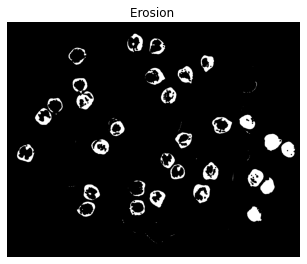

In [63]:
ret,thresh1 = cv.threshold(peas,50,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(peas,120,255,cv.THRESH_BINARY)
resta = cv.subtract(thresh1,thresh2)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(resta,kernel,iterations = 1)
# morph_closing = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(25,25))
plot(erosion,subplot = (5,2,3), title= 'Erosion ')


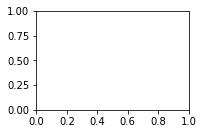

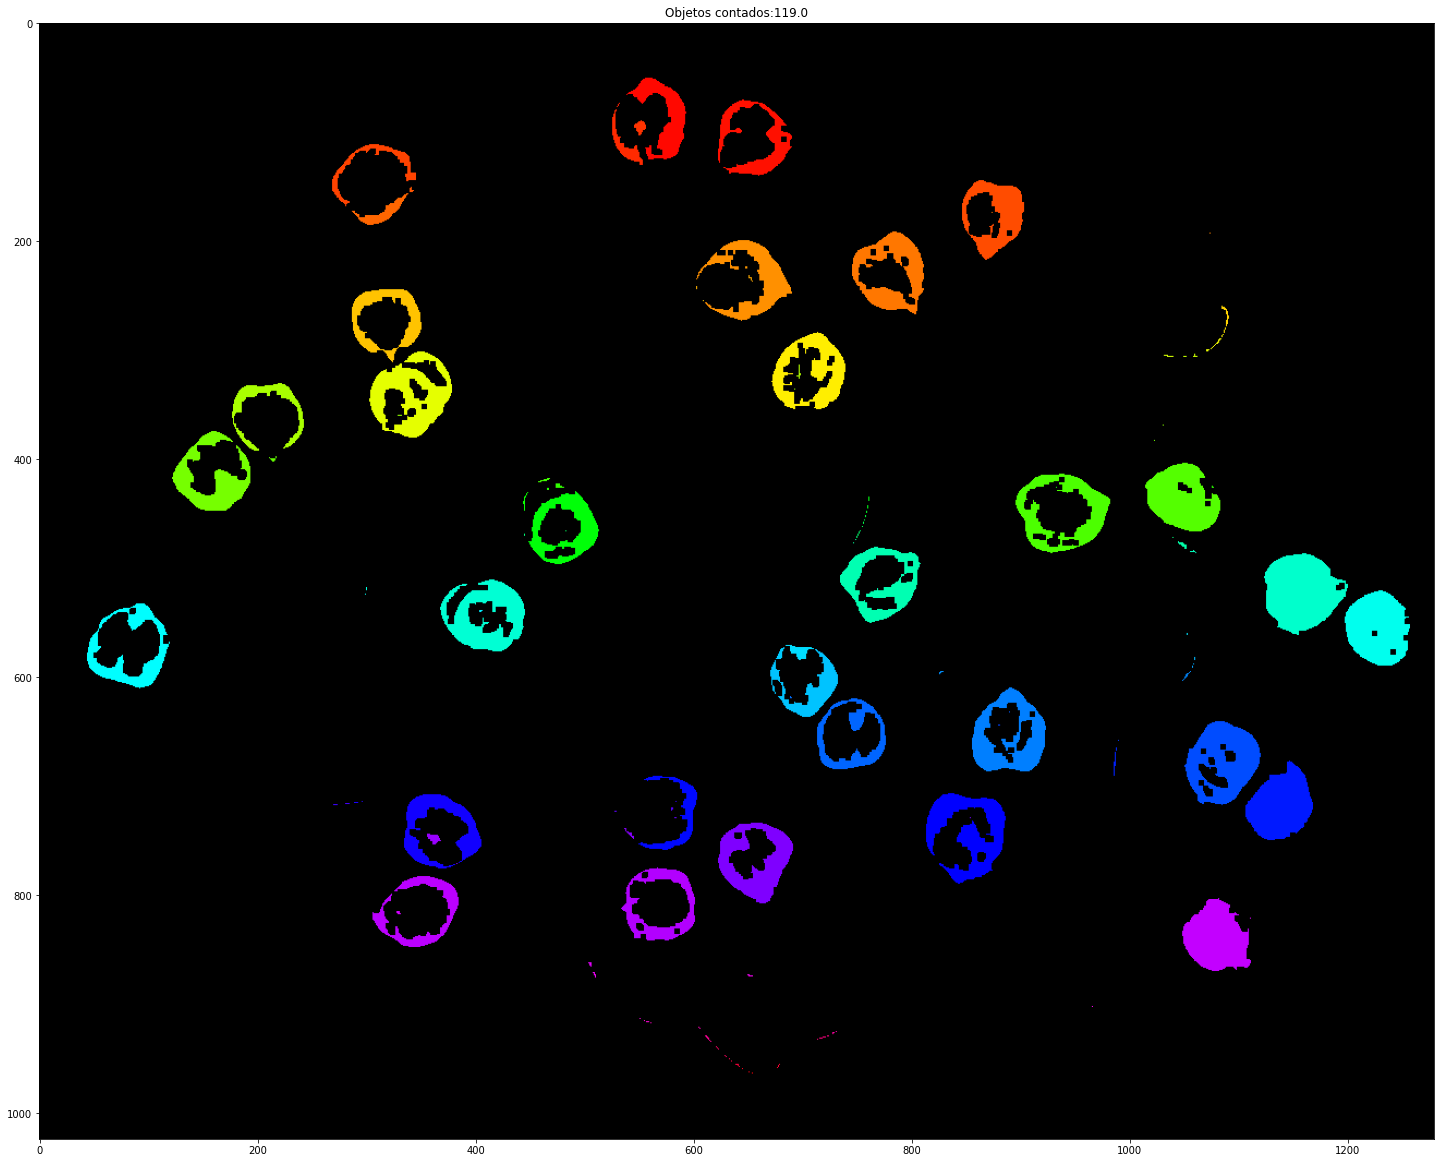

In [71]:

ret2, labels2 = cv.connectedComponents(erosion)

label_hue = np.uint8(179 * labels2 / np.max(labels2))
blank_ch = 255 * np.ones_like(label_hue)

labeled_img = cv.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv.cvtColor(labeled_img, cv2.COLOR_HSV2RGB)

labeled_img[label_hue == 0] = 0


plt.subplot(222)
plt.figure(figsize=(25,25))
plt.title('Objetos contados:'+ str(ret-1))
plt.imshow(labeled_img)

# plt.show()